# 📊 Análise de Evasão de Clientes - TelecomX


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [172]:
dados_telecom = pd.read_json('/content/TelecomX_Data.json')

In [173]:
dados_telecom.head(20)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [174]:
colunas = list(dados_telecom.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [175]:
# Normalizar as colunas com dicionários
customer_df = pd.json_normalize(dados_telecom['customer'])
phone_df    = pd.json_normalize(dados_telecom['phone'])
internet_df = pd.json_normalize(dados_telecom['internet'])
account_df  = pd.json_normalize(dados_telecom['account'])

# Concatenar tudo no DataFrame original
dados_telecom_normalized = pd.concat([
    dados_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

#Tornando o nome de todas as colunas com letras minúsculas
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.lower()

# Trocar campos vazios por NaN em 'charges.total'
dados_telecom_normalized['charges.total'] = dados_telecom_normalized['charges.total'].replace(' ', np.nan)

# Converter coluna para float
dados_telecom_normalized['charges.total'] = dados_telecom_normalized['charges.total'].astype(np.float64)

#excluir coluna 'customerid' por não ser util na analise
dados_telecom_normalized = dados_telecom_normalized.drop(['customerid'], axis=1)

#remover colunas duplicadas
dados_telecom_normalized = dados_telecom_normalized.drop_duplicates()

# Substitui dados vazios por NaN
dados_telecom_normalized['churn'] = dados_telecom_normalized['churn'].replace('', np.nan)

# Remove linhas onde a coluna 'churn' é NaN
dados_telecom_normalized = dados_telecom_normalized[dados_telecom_normalized['churn'].notna()]

# Remove linhas onde a coluna 'charges.total' é NaN
dados_telecom_normalized = dados_telecom_normalized[dados_telecom_normalized['charges.total'].notna()]

#adicionar coluna 'contas_diarias'
dados_telecom_normalized['contas_diarias'] = dados_telecom_normalized['charges.monthly'].div(30)

#traduzir o nome de todas as colunas
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('churn', 'evasão')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('gender', 'gênero')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('seniorcitizen', 'idoso')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('partner', 'parceiro')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('dependents', 'dependetes')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('tenure', 'tempo_de_contrato')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('phoneservice', 'serviço_de_telefone')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('multiplelines', 'linhas_múltiplas')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('internetservice', 'serviço_de_internet')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('onlinesecurity', 'segurança_online')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('onlinebackup', 'backup_online')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('deviceprotection', 'proteção_de_dispositivos')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('techsupport', 'suporte_tecnico')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('streamingtv', 'tv_a_cabo')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('streamingmovies', 'filmes_a_cabo')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('contract', 'tipo_de_contrato')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('paperlessbilling', 'fatura_eletronica')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('paymentmethod', 'metodo_de_pagamento')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('charges.monthly', 'mensalidades')
dados_telecom_normalized.columns = dados_telecom_normalized.columns.str.replace('charges.total', 'total_de_gastos')

# Exibir as primeiras linhas
dados_telecom_normalized.head()

,evasão,gênero,idoso,parceiro,dependetes,tempo_de_contrato,serviço_de_telefone,linhas_múltiplas,serviço_de_internet,segurança_online,...,proteção_de_dispositivos,suporte_tecnico,tv_a_cabo,filmes_a_cabo,tipo_de_contrato,fatura_eletronica,metodo_de_pagamento,mensalidades,total_de_gastos,contas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [176]:
#trocar 'No internet service' ou 'No phone service' como 'No'

cols_com_no_service = [
    'linhas_múltiplas', 'segurança_online', 'backup_online',
    'proteção_de_dispositivos', 'suporte_tecnico', 'tv_a_cabo', 'filmes_a_cabo'
]

for col in cols_com_no_service:
    dados_telecom_normalized[col] = dados_telecom_normalized[col].replace('No internet service', 'No')
    dados_telecom_normalized[col] = dados_telecom_normalized[col].replace('No phone service', 'No')


In [177]:
dados_telecom_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   evasão                    7010 non-null   object 
 1   gênero                    7010 non-null   object 
 2   idoso                     7010 non-null   int64  
 3   parceiro                  7010 non-null   object 
 4   dependetes                7010 non-null   object 
 5   tempo_de_contrato         7010 non-null   int64  
 6   serviço_de_telefone       7010 non-null   object 
 7   linhas_múltiplas          7010 non-null   object 
 8   serviço_de_internet       7010 non-null   object 
 9   segurança_online          7010 non-null   object 
 10  backup_online             7010 non-null   object 
 11  proteção_de_dispositivos  7010 non-null   object 
 12  suporte_tecnico           7010 non-null   object 
 13  tv_a_cabo                 7010 non-null   object 
 14  filmes_a_cabo

In [178]:
#Script completo para análise geral de inconsistências

# 1. Formato geral
print("Formato do DataFrame:", dados_telecom_normalized.shape)

# 2. Verificar tipos de dados
print("\nTipos de dados:")
print(dados_telecom_normalized.dtypes)

# 3. Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(dados_telecom_normalized.isnull().sum())

# 4. Verificar duplicatas (linhas idênticas)
print("\nNúmero de linhas duplicadas:", dados_telecom_normalized.duplicated().sum())

# 5. Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
for col in dados_telecom_normalized.columns:
    print(f"{col}: {dados_telecom_normalized[col].nunique()}")

# 6. Exibir valores únicos nas colunas categóricas
print("\nValores únicos por coluna categórica:")
for col in dados_telecom_normalized.select_dtypes(include='object').columns:
    print(f"{col}: {dados_telecom_normalized[col].unique()}")

# 7. Estatísticas das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(dados_telecom_normalized.describe())


Formato do DataFrame: (7010, 21)

Tipos de dados:
evasão                       object
gênero                       object
idoso                         int64
parceiro                     object
dependetes                   object
tempo_de_contrato             int64
serviço_de_telefone          object
linhas_múltiplas             object
serviço_de_internet          object
segurança_online             object
backup_online                object
proteção_de_dispositivos     object
suporte_tecnico              object
tv_a_cabo                    object
filmes_a_cabo                object
tipo_de_contrato             object
fatura_eletronica            object
metodo_de_pagamento          object
mensalidades                float64
total_de_gastos             float64
contas_diarias              float64
dtype: object

Valores ausentes por coluna:
evasão                      0
gênero                      0
idoso                       0
parceiro                    0
dependetes                  0


Tratamento finalizado

In [179]:
#lista das colunas com 'Yes' e 'No'.
colunas_binarias = ['evasão', 'parceiro', 'dependetes', 'serviço_de_telefone', 'linhas_múltiplas', 'segurança_online', 'backup_online',
                    'proteção_de_dispositivos', 'suporte_tecnico', 'tv_a_cabo', 'filmes_a_cabo', 'fatura_eletronica']


colunas_binarias

['evasão',
 'parceiro',
 'dependetes',
 'serviço_de_telefone',
 'linhas_múltiplas',
 'segurança_online',
 'backup_online',
 'proteção_de_dispositivos',
 'suporte_tecnico',
 'tv_a_cabo',
 'filmes_a_cabo',
 'fatura_eletronica']

In [180]:
#trocar os valores textuais "Sim" e "Não" por 1 e 0.
dados_telecom_normalized[colunas_binarias] = dados_telecom_normalized[colunas_binarias].replace({'Yes': 1, 'No': 0})
dados_telecom_normalized['gênero'] = dados_telecom_normalized['gênero'].replace({'Female': 'Mulher', 'Male': 'Homem'})
dados_telecom_normalized['serviço_de_internet'] = dados_telecom_normalized['serviço_de_internet'].replace({'Fiber optic': 'Fibra óptica', 'No': 'Não'})
dados_telecom_normalized['tipo_de_contrato'] = dados_telecom_normalized['tipo_de_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensal', 'Two year': 'Dois anos'})
dados_telecom_normalized['metodo_de_pagamento'] = dados_telecom_normalized['metodo_de_pagamento'].replace({'Electronic check': 'Cheque eletrônico', 'Mailed check': 'Cheque escrito', 'Bank transfer (automatic)': 'Transferência bancária', 'Credit card (automatic)': 'Cartão de crédito'})
dados_telecom_normalized.head()

/tmp/ipython-input-180-2855804921.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_telecom_normalized[colunas_binarias] = dados_telecom_normalized[colunas_binarias].replace({'Yes': 1, 'No': 0})


,evasão,gênero,idoso,parceiro,dependetes,tempo_de_contrato,serviço_de_telefone,linhas_múltiplas,serviço_de_internet,segurança_online,...,proteção_de_dispositivos,suporte_tecnico,tv_a_cabo,filmes_a_cabo,tipo_de_contrato,fatura_eletronica,metodo_de_pagamento,mensalidades,total_de_gastos,contas_diarias
0,0,Mulher,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque escrito,65.6,593.30,2.186667
1,0,Homem,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensal,0,Cheque escrito,59.9,542.40,1.996667
2,1,Homem,0,0,0,4,1,0,Fibra óptica,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,73.9,280.85,2.463333
3,1,Homem,1,1,0,13,1,0,Fibra óptica,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,98.0,1237.85,3.266667
4,1,Mulher,1,1,0,3,1,0,Fibra óptica,0,...,0,1,1,0,Mensal,1,Cheque escrito,83.9,267.40,2.796667


In [181]:
#Script completo para análise geral de inconsistências

# 1. Formato geral
print("Formato do DataFrame:", dados_telecom_normalized.shape)

# 2. Verificar tipos de dados
print("\nTipos de dados:")
print(dados_telecom_normalized.dtypes)

# 3. Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(dados_telecom_normalized.isnull().sum())

# 4. Verificar duplicatas (linhas idênticas)
print("\nNúmero de linhas duplicadas:", dados_telecom_normalized.duplicated().sum())

# 5. Verificar valores únicos por coluna
print("\nValores únicos por coluna:")
for col in dados_telecom_normalized.columns:
    print(f"{col}: {dados_telecom_normalized[col].nunique()}")

# 6. Exibir valores únicos nas colunas categóricas
print("\nValores únicos por coluna categórica:")
for col in dados_telecom_normalized.select_dtypes(include='object').columns:
    print(f"{col}: {dados_telecom_normalized[col].unique()}")

# 7. Estatísticas das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(dados_telecom_normalized.describe())


Formato do DataFrame: (7010, 21)

Tipos de dados:
evasão                        int64
gênero                       object
idoso                         int64
parceiro                      int64
dependetes                    int64
tempo_de_contrato             int64
serviço_de_telefone           int64
linhas_múltiplas              int64
serviço_de_internet          object
segurança_online              int64
backup_online                 int64
proteção_de_dispositivos      int64
suporte_tecnico               int64
tv_a_cabo                     int64
filmes_a_cabo                 int64
tipo_de_contrato             object
fatura_eletronica             int64
metodo_de_pagamento          object
mensalidades                float64
total_de_gastos             float64
contas_diarias              float64
dtype: object

Valores ausentes por coluna:
evasão                      0
gênero                      0
idoso                       0
parceiro                    0
dependetes                  0


#📊 Carga e análise

In [185]:
#compreendendo os valores de média, mediana e desvio padrão.
print(dados_telecom_normalized.describe())

            evasão        idoso     parceiro   dependetes  tempo_de_contrato  \
count  7010.000000  7010.000000  7010.000000  7010.000000        7010.000000   
mean      0.264907     0.162767     0.484023     0.299429          32.520399   
std       0.441315     0.369180     0.499780     0.458041          24.520441   
min       0.000000     0.000000     0.000000     0.000000           1.000000   
25%       0.000000     0.000000     0.000000     0.000000           9.000000   
50%       0.000000     0.000000     0.000000     0.000000          29.000000   
75%       1.000000     0.000000     1.000000     1.000000          56.000000   
max       1.000000     1.000000     1.000000     1.000000          72.000000   

       serviço_de_telefone  linhas_múltiplas  segurança_online  backup_online  \
count          7010.000000       7010.000000       7010.000000    7010.000000   
mean              0.902996          0.423252          0.287447       0.345934   
std               0.295985          

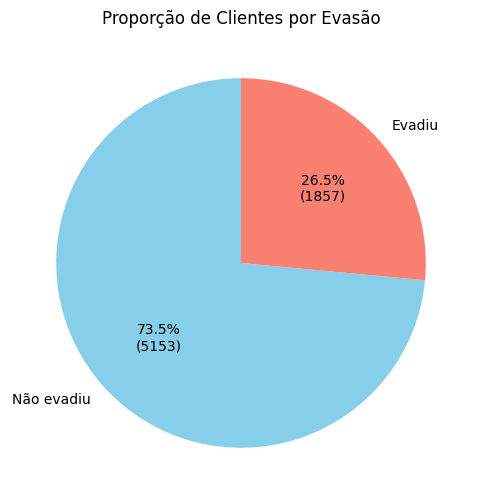

In [209]:
# Renomeia os índices para melhor visualização
evasão_counts.index = ['Não evadiu', 'Evadiu']

# Função para exibir percentual + quantidade
def autopct_format(pct):
    total = sum(evasão_counts)
    count = int(round(pct/100.*total))
    return f'{pct:.1f}%\n({count})'

# Gráfico de pizza
plt.figure(figsize=(6,6))
evasão_counts.plot(
    kind='pie',
    autopct=autopct_format,
    startangle=90,
    colors=['skyblue', 'salmon']
)
plt.title('Proporção de Clientes por Evasão')
plt.ylabel('')
plt.show()

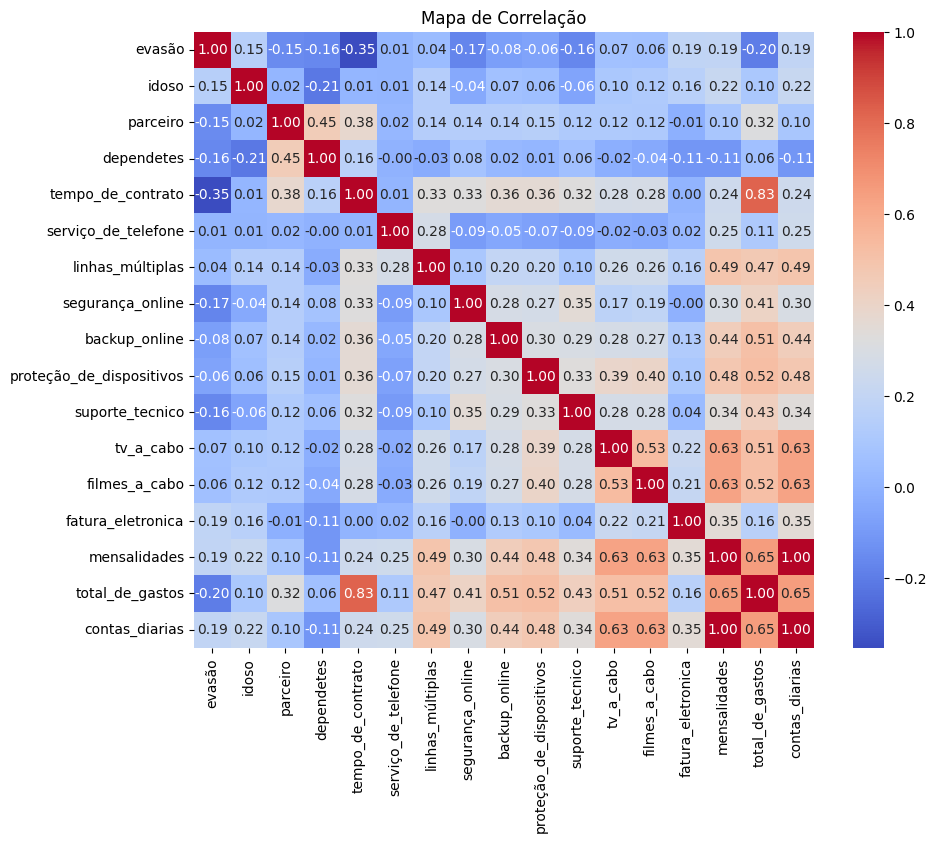

In [188]:
plt.figure(figsize=(10,8))
sns.heatmap(dados_telecom_normalized.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

/tmp/ipython-input-215-2632371750.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não idoso', 'Idoso'])


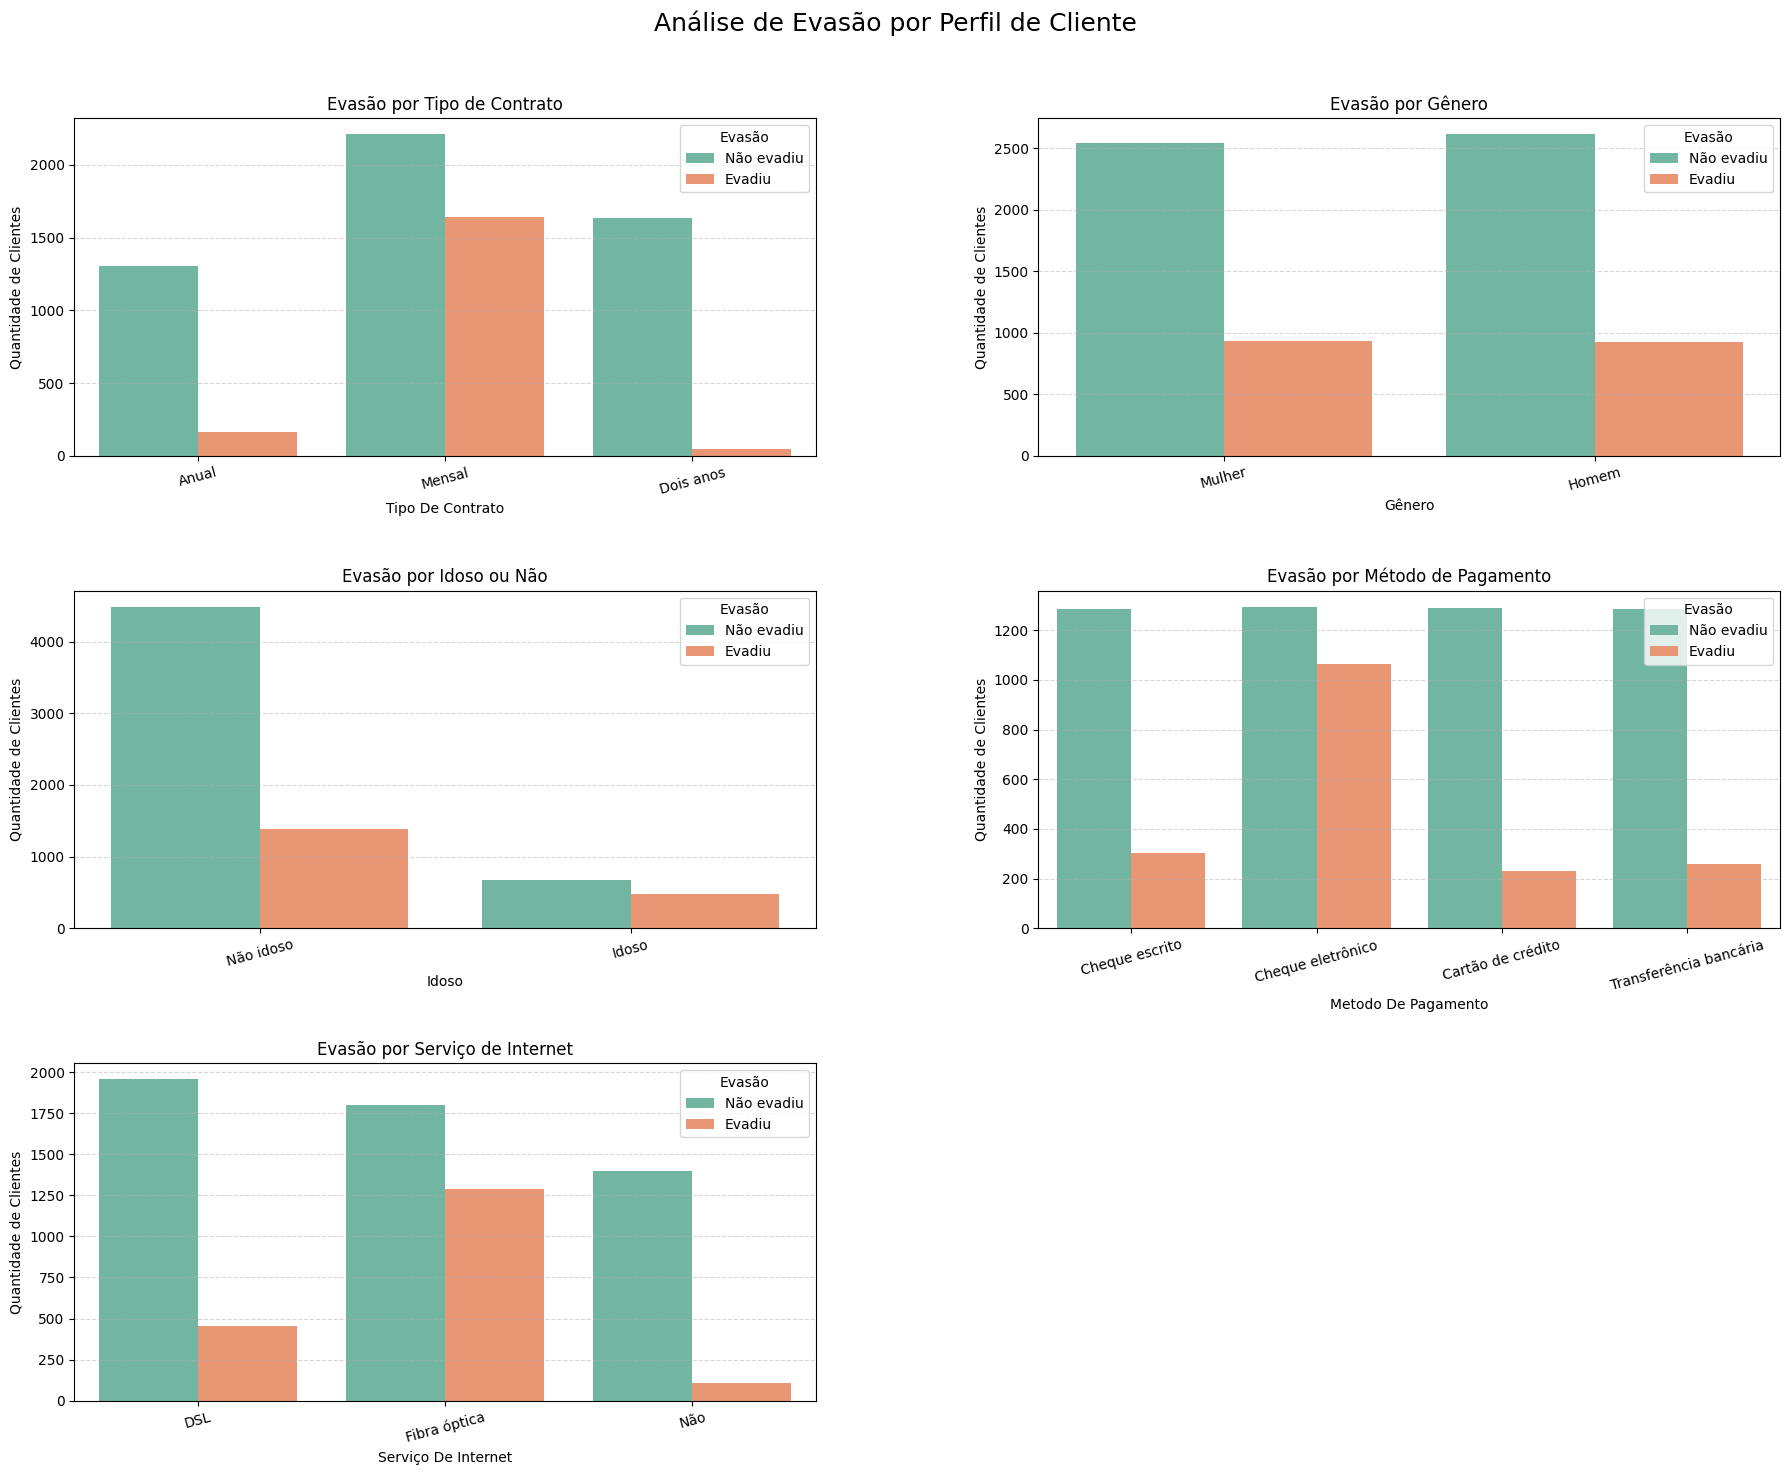

In [215]:
# Ajusta o tamanho total da figura e layout
fig, axs = plt.subplots(3, 2, figsize=(18, 15))  # 3 linhas, 2 colunas
fig.suptitle('Análise de Evasão por Perfil de Cliente', fontsize=18)

# Lista de configurações
graficos = [
    ('tipo_de_contrato', 'Evasão por Tipo de Contrato', axs[0, 0]),
    ('gênero', 'Evasão por Gênero', axs[0, 1]),
    ('idoso', 'Evasão por Idoso ou Não', axs[1, 0]),
    ('metodo_de_pagamento', 'Evasão por Método de Pagamento', axs[1, 1]),
    ('serviço_de_internet', 'Evasão por Serviço de Internet', axs[2, 0])
]

# Loop para criar os gráficos
for coluna, titulo, ax in graficos:
    sns.countplot(data=dados_telecom_normalized, x=coluna, hue='evasão', palette='Set2', ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel(coluna.replace('_', ' ').title())
    ax.set_ylabel('Quantidade de Clientes')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend(title='Evasão', labels=['Não evadiu', 'Evadiu'])
    ax.tick_params(axis='x', rotation=15)

    # Trocar o rótulo de 'idoso' manualmente
    if coluna == 'idoso':
        ax.set_xticklabels(['Não idoso', 'Idoso'])

# Esconde o sexto gráfico vazio
fig.delaxes(axs[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para o título geral não sobrepor
fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


/tmp/ipython-input-214-2437758443.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_telecom_normalized, x='evasão', y='mensalidades', palette='Set2', ax=axs[0, 0])
/tmp/ipython-input-214-2437758443.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Não evadiu', 'Evadiu'])
/tmp/ipython-input-214-2437758443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_telecom_normalized, x='evasão', y='contas_diarias', palette='Set2', ax=axs[0, 1])
/tmp/ipython-input-214-2437758443.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of tick

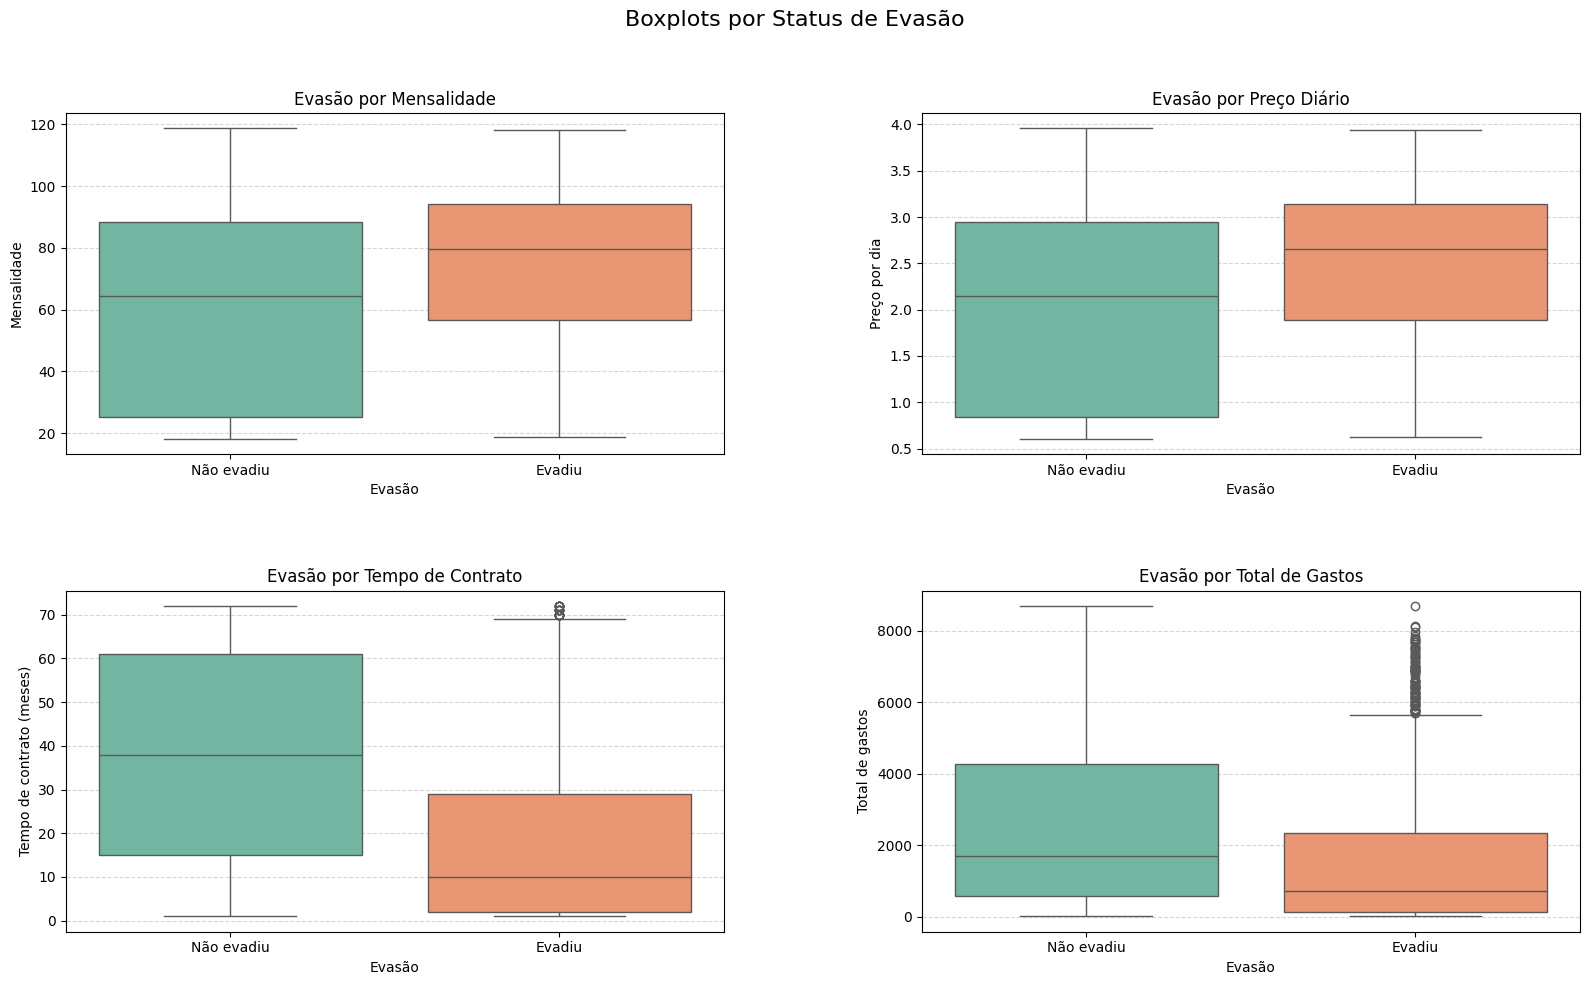

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Boxplots por Status de Evasão', fontsize=16)

# Boxplot 1 – Mensalidades
sns.boxplot(data=dados_telecom_normalized, x='evasão', y='mensalidades', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Evasão por Mensalidade')
axs[0, 0].set_xlabel('Evasão')
axs[0, 0].set_ylabel('Mensalidade')
axs[0, 0].set_xticklabels(['Não evadiu', 'Evadiu'])
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot 2 – Contas diárias
sns.boxplot(data=dados_telecom_normalized, x='evasão', y='contas_diarias', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Evasão por Preço Diário')
axs[0, 1].set_xlabel('Evasão')
axs[0, 1].set_ylabel('Preço por dia')
axs[0, 1].set_xticklabels(['Não evadiu', 'Evadiu'])
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot 3 – Tempo de contrato
sns.boxplot(data=dados_telecom_normalized, x='evasão', y='tempo_de_contrato', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Evasão por Tempo de Contrato')
axs[1, 0].set_xlabel('Evasão')
axs[1, 0].set_ylabel('Tempo de contrato (meses)')
axs[1, 0].set_xticklabels(['Não evadiu', 'Evadiu'])
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot 4 – Total de gastos
sns.boxplot(data=dados_telecom_normalized, x='evasão', y='total_de_gastos', palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Evasão por Total de Gastos')
axs[1, 1].set_xlabel('Evasão')
axs[1, 1].set_ylabel('Total de gastos')
axs[1, 1].set_xticklabels(['Não evadiu', 'Evadiu'])
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

/tmp/ipython-input-198-565652488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=dados_telecom_normalized,
/tmp/ipython-input-198-565652488.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não evadiu', 'Evadiu'])


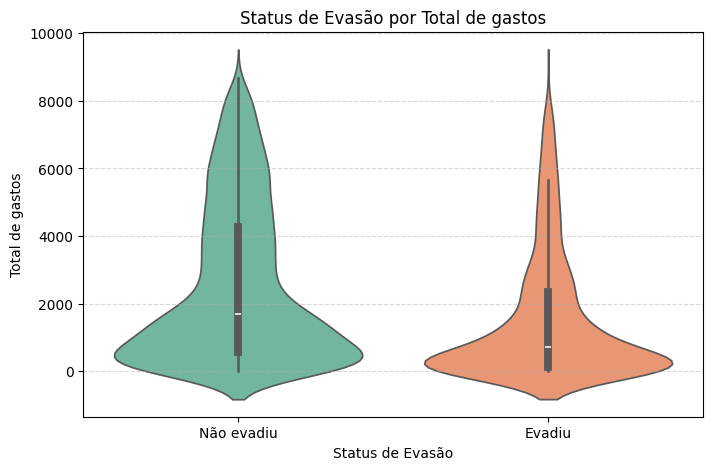

In [198]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=dados_telecom_normalized,
               x='evasão',
               y='total_de_gastos',
               palette='Set2')
plt.title('Status de Evasão por Total de gastos')
plt.xlabel('Status de Evasão')
plt.ylabel('Total de gastos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_xticklabels(['Não evadiu', 'Evadiu'])
plt.show()

/tmp/ipython-input-199-3068202432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data=dados_telecom_normalized,
/tmp/ipython-input-199-3068202432.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não evadiu', 'Evadiu'])


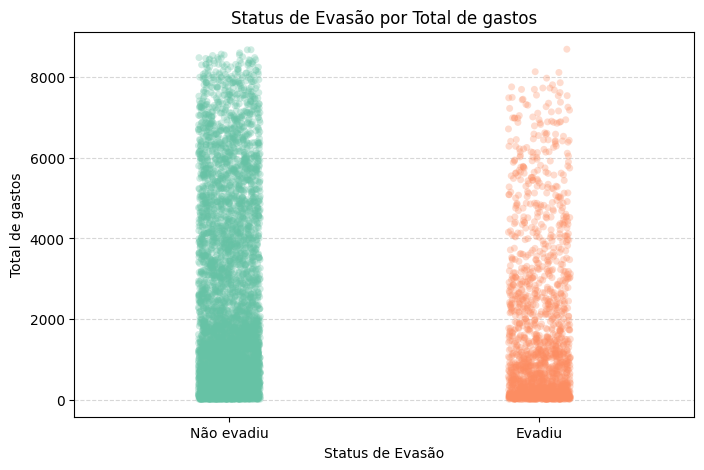

In [199]:
plt.figure(figsize=(8,5))
ax = sns.stripplot(data=dados_telecom_normalized,
              x='evasão',
              y='total_de_gastos',
              jitter=True,
              alpha=0.3,
              palette='Set2')

plt.title('Status de Evasão por Total de gastos')
plt.xlabel('Status de Evasão')
plt.ylabel('Total de gastos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_xticklabels(['Não evadiu', 'Evadiu'])
plt.show()

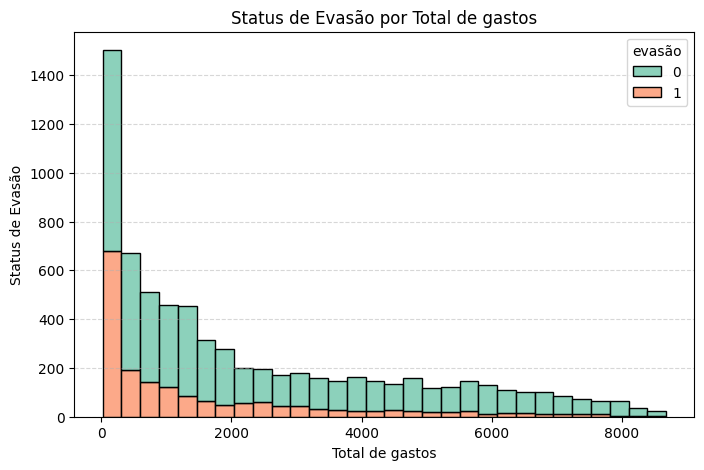

In [200]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=dados_telecom_normalized,
             x='total_de_gastos',
             hue='evasão',
             multiple='stack',
             palette='Set2',
             bins=30)


plt.title('Status de Evasão por Total de gastos')
plt.xlabel('Total de gastos')
plt.ylabel('Status de Evasão')
plt.grid(axis='y', linestyle='--', alpha=0.5)


# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=['Não evadiu', 'Evadiu'], title='Evasão')

plt.show()

/tmp/ipython-input-201-589648395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=dados_telecom_normalized,
/tmp/ipython-input-201-589648395.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não evadiu', 'Evadiu'])


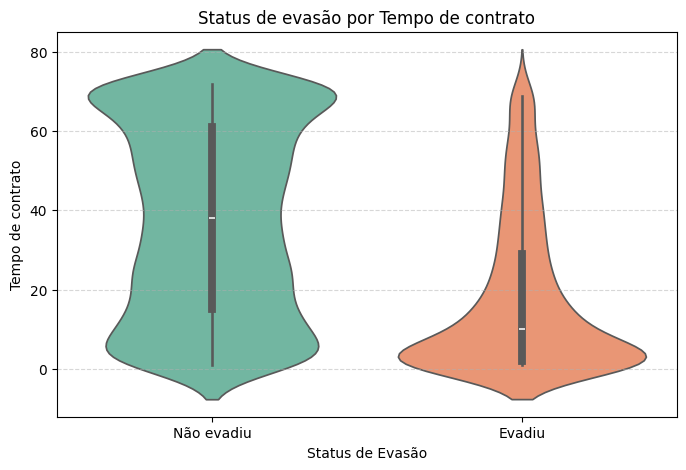

In [201]:
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=dados_telecom_normalized,
               x='evasão',
               y='tempo_de_contrato',
               palette='Set2')
plt.title('Status de evasão por Tempo de contrato')
plt.xlabel('Status de Evasão')
plt.ylabel('Tempo de contrato')
plt.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_xticklabels(['Não evadiu', 'Evadiu'])
plt.show()

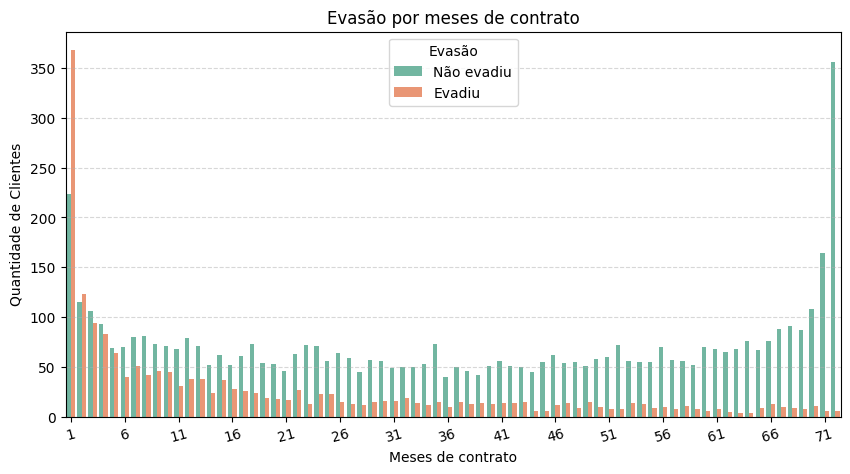

In [202]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=dados_telecom_normalized, x='tempo_de_contrato', hue='evasão', palette='Set2')
plt.title('Evasão por meses de contrato')
plt.xlabel('Meses de contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Evasão')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
#colocar intervalos de 5 em 5 no eixo x.
plt.xticks(range(0, 75, 5))

# Alterar a legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Não evadiu', 'Evadiu'], title='Evasão')

plt.show()

#📄Relatorio Final

Introdução: Explique o objetivo da análise e o problema de evasão de clientes (Churn).

Limpeza e Tratamento de Dados: Descreva os passos realizados para importar, limpar e tratar os dados.

Análise Exploratória de Dados: Apresente as análises feitas, incluindo gráficos e visualizações para identificar padrões.

Conclusões e Insights: Resuma os principais achados e como esses dados podem ajudar a reduzir a evasão.

Recomendações: Ofereça sugestões baseadas na sua análise.

### 🧾 Introdução

A evasão de clientes (churn) é um dos principais desafios enfrentados por empresas de telecomunicações. Este projeto tem como objetivo analisar o comportamento dos clientes da TelecomX para entender os principais fatores que influenciam a evasão e propor ações que ajudem a reduzi-la, com base em dados reais e estruturados.

---

### 🧹 Limpeza e Tratamento de Dados

As seguintes etapas foram realizadas:

- **Importação dos dados** no formato `.json` e conversão para DataFrame.
- **Normalização da estrutura aninhada**, separando informações de cliente, conta, telefone e internet.
- **Renomeação de colunas** para facilitar a leitura.
- Conversão da variável `Churn` para binária (`1 = Evadiu`, `0 = Não evadiu`).
- Criação de novas colunas como:
  - `contas_diarias` = `Charges.Monthly / 30`
  - `idoso` = `SeniorCitizen` mapeado como 0/1
- Conversão de colunas numéricas como `Charges.Total`, originalmente do tipo texto.
- Remoção de registros duplicados e tratamento de valores ausentes.
- Transformação de variáveis categóricas com valores como "Yes"/"No" em 1 e 0 (quando necessário).

---

### 📊 Análise Exploratória de Dados (EDA)

#### 📌 Distribuição de evasão

- A maioria dos clientes **não evadiu**, mas cerca de **27%** deixaram a empresa.

#### 📈 Correlações

- Clientes com **contratos mensais** têm maior taxa de evasão.
- **Evasão está negativamente correlacionada** com:
  - Tempo de contrato
  - Serviços adicionais como backup, segurança online e suporte técnico.
- Clientes que **pagam mais por mês** ou usam **pagamento eletrônico** têm maior propensão a evadir.

#### 📉 Perfis de risco

- Evasão é mais comum entre:
  - Clientes **com menos tempo de casa**
  - Clientes **sem dependentes ou parceiros**
  - Clientes **que utilizam menos serviços**
  - Clientes com **contrato mensal**

#### 📊 Gráficos utilizados

- `countplot()` para comparar categorias com evasão
- `boxplot()` e `violinplot()` para verificar distribuição de gastos e tempo de contrato
- `heatmap()` de correlação
- Gráficos com e sem outliers, dependendo da análise

---

### 🧠 Conclusões e Insights

- **Tempo de contrato é o fator mais importante**: quanto mais tempo, menor a chance de evasão.
- **Serviços adicionais aumentam retenção**: backup, suporte e segurança online estão ligados a menor churn.
- **Método de pagamento influencia**: pagamentos automáticos apresentam menor evasão.
- **Clientes com mensalidades mais altas evadem mais**, indicando sensibilidade ao preço.

---

### ✅ Recomendações

1. **Oferecer descontos e bônus para contratos de longo prazo**.
2. **Incentivar adesão a serviços adicionais**, oferecendo pacotes combinados com preços reduzidos.
3. **Criar campanhas de retenção específicas para clientes novos**, especialmente nos primeiros 6 meses.
4. **Oferecer vantagens para quem adota pagamento automático**.
5. Monitorar clientes com perfis de risco usando os padrões identificados.